In [66]:
#%matplotlib widget

import numpy as np, re
import matplotlib.pyplot as plt

In [62]:
def get_file(path):
    #opens and external file and makes it into a list
    fopen = path
    f=open(fopen, 'r+')
    g=list(f)
    g=map(lambda s: s.strip(), g)
    return np.array(list(g))

def splitt(old_list):
    #splits the list entries into sublists
    new_list=[]
    for i in old_list:
        new_list+=[i.split()]
    return np.array(new_list)

def name2long(name):
    if   '-' in name: return float(name.split('-')[0])
    elif '+' in name: return float(name.split('+')[0])

In [44]:
z = splitt(get_file('/Users/Lucas/Methanol_multibeam_radec.txt')[4:-2])

In [45]:
for i in range(len(z)):
    if not len(z[i])==11: print(i,len(z[i]),z[i])

In [47]:
names, rh, rm, rs, dd, dm, ds, v1, f1, v2, f2 = z.T

In [79]:
L = []
for name in names:
    L.append(name2long(name))
    
l=np.array(L)
l[l > 180] = l[l>180]-360

(-150, 120)

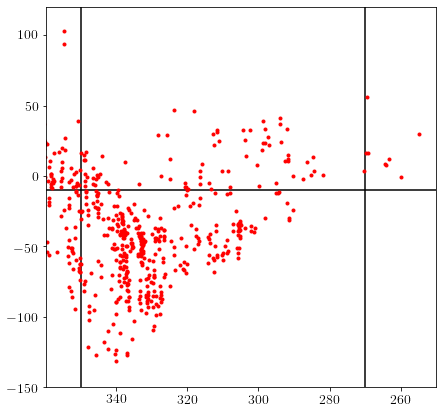

In [123]:
fig, ax = plt.subplots(1,figsize=(7,7))
ax.plot(l+360,v2.astype(float),'r.')
ax.invert_xaxis()
ax.hlines(y=-10,xmin=240,xmax=400)
ax.vlines(x=350,ymin=-200,ymax=200)
ax.vlines(x=270,ymin=-200,ymax=200)
ax.set_xlim(359.9,250)
ax.set_ylim(-150,120)

(359.9, 270)

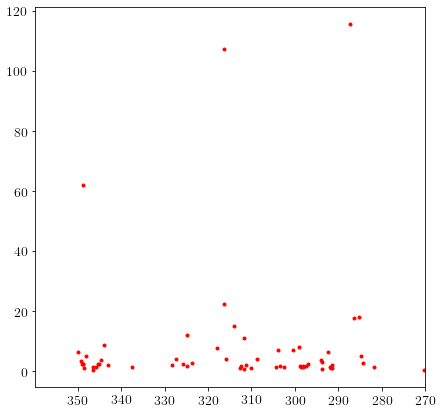

In [161]:
indx1 = v1.astype(float)>-5
indx2 = (l < -10)*(l + 360 > 270)
indx = indx1 * indx2
fig, ax = plt.subplots(1,figsize=(7,7))
ax.plot(l[indx]+360,f2[indx].astype(float),'r.')
ax.invert_xaxis()
ax.set_xlim(359.9,270)

In [162]:
indx.sum()

62

In [167]:
for i in z[indx]:
    print('{:15s}{:2s}h{:2s}m{:2s}s {:>4s}d{:2s}m{:3s}s {:>6s}{:>8s}'.format(*i))

345.198-0.030  17h04m59.49s  -41d12m45.7s   -0.5    2.53
345.441+0.205  17h04m46.87s  -40d52m38.0s    0.9    2.27
345.807-0.044  17h06m59.85s  -40d44m08.2s   -2.0    1.00
346.517+0.117  17h08m33.20s  -40d04m14.3s   -1.7    0.30
346.522+0.085  17h08m42.29s  -40d05m07.8s    5.7    1.90
348.195+0.768  17h11m00.20s  -38d20m05.5s   -0.8    4.55
348.654+0.244  17h14m32.37s  -38d16m16.8s   16.9    0.82
348.723-0.078  17h16m04.77s  -38d24m08.8s   11.5    2.58
348.703-1.043  17h20m04.06s  -38d58m30.9s   -3.5   65.00
348.892-0.180  17h17m00.23s  -38d19m28.9s    1.5    2.70
349.067-0.017  17h16m50.74s  -38d05m14.3s   11.6    2.30
349.151+0.021  17h16m55.88s  -37d59m47.9s   14.6    3.36
349.884+0.231  17h18m12.37s  -37d16m40.0s   16.2    6.96
337.517-0.348  16h39m03.09s  -47d20m48.7s    9.4    1.50
342.954-0.019  16h57m30.66s  -42d58m34.8s   -3.0    2.00
343.929+0.125  17h00m10.91s  -42d07m19.3s   14.4    9.00
344.581-0.024  17h02m57.71s  -41d41m53.8s    1.4    3.50
270.255+0.835  09h16m41.51s  -4